In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df1 = pd.read_csv("FashionDataset.csv")

In [13]:
df1.head(4)

,Unnamed: 0,BrandName,Deatils,Sizes,MRP,SellPrice,Discount,Category
0,0,life,solid cotton blend collar neck womens a-line d...,"Size:Large,Medium,Small,X-Large,X-Small",Rs\n1699,849,50% off,Westernwear-Women
1,1,only,polyester peter pan collar womens blouson dres...,"Size:34,36,38,40",Rs\n3499,2449,30% off,Westernwear-Women
2,2,fratini,solid polyester blend wide neck womens regular...,"Size:Large,X-Large,XX-Large",Rs\n1199,599,50% off,Westernwear-Women
3,3,zink london,stripes polyester sweetheart neck womens dress...,"Size:Large,Medium,Small,X-Large",Rs\n2299,1379,40% off,Westernwear-Women


Dropeo el indice que no sirve

In [14]:
df1 = df1.drop("Unnamed: 0", axis=1)

Hay o no hay Nan

In [17]:
df1.isna().sum()
# Mas adelante se observará que si hay valores nan

BrandName    0
Deatils      0
Sizes        0
MRP          0
SellPrice    0
Discount     0
Category     0
dtype: int64

In [18]:
df1.shape

(30758, 7)

Que dtype tiene cada col

In [19]:
df1.dtypes

BrandName    object
Deatils      object
Sizes        object
MRP          object
SellPrice    object
Discount     object
Category     object
dtype: object

In [20]:
df1.columns

Index(['BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount',
       'Category'],
      dtype='object')

Cuantos valores unicos tiene cada col:

In [21]:
L = ('BrandName', 'Deatils', 'Sizes', 'MRP', 'SellPrice', 'Discount', 'Category')

for x in L:
    print(x, "tiene:   ", df1[x].nunique())

BrandName tiene:    275
Deatils tiene:    23877
Sizes tiene:    1172
MRP tiene:    1097
SellPrice tiene:    2046
Discount tiene:    66
Category tiene:    7


Hago un strip de carácteres sin utilidad

In [22]:
df1["MRP"] = df1["MRP"].map(lambda x: str(x).lstrip('Rs\n').rstrip('Rs\n')).astype(float)

In [23]:
df1["Discount"] = df1["Discount"].map(lambda x: str(x).lstrip('% off').rstrip('% off')).astype(float)

In [24]:
df1["Discount"] = df1["Discount"].map(lambda x: x/100)

In [25]:
### Convierto object a num

data_types_dict= {"SellPrice":float,
                                     }
 
df1 = df1.astype(data_types_dict)

Observamos valores nan, que previamente no existían pero que aparecieron después de realizar el stripping y el cambio de dtype.
Sin embargo no se borran valores nan del Discount ya que representan productos sin descuento

In [26]:
df1[["SellPrice"]].isna().sum()

SellPrice    1183
dtype: int64

In [27]:
df1.isna().sum()

BrandName       0
Deatils         0
Sizes           0
MRP          8208
SellPrice    1183
Discount     8208
Category        0
dtype: int64

In [19]:
df1.describe()

,MRP,SellPrice,Discount
count,22550.000000,29575.000000,22550.000000
mean,2644.677295,1923.680642,0.448949
std,2322.499186,3049.333237,0.150231
min,149.000000,74.000000,0.000000
25%,1399.000000,749.000000,0.300000
50%,1999.000000,1209.000000,0.500000
75%,3099.000000,2069.000000,0.550000
max,32995.000000,142500.000000,0.850000


En el "describe" se podría considerar que la data está un poco sesgada, sin embargo, es natural y no debe clipearse

Text(0.5, 1.0, 'Q de Category')

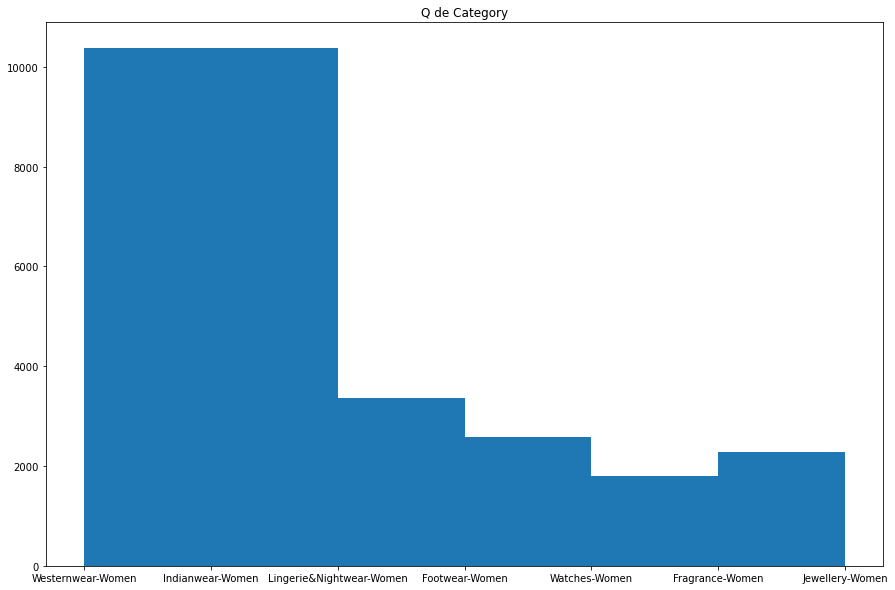

In [20]:
## Observar las distribuciones de las columnas

import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(15,10))
plt.hist(df1["Category"], bins = 6)
plt.xlabel("")
plt.ylabel("")
plt.title("Category")

El retail vende en su mayoría ropas de tipo occidental e hindú para mujeres.

Text(0.5, 1.0, 'Q de Category')

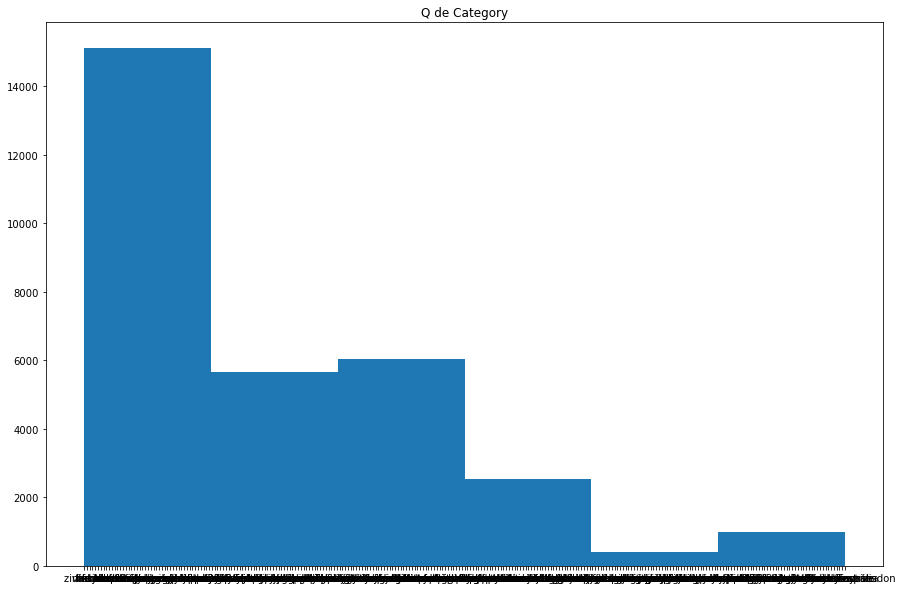

In [21]:
plt.figure(figsize=(15,10))
plt.hist(df1["BrandName"], bins = 6)
plt.xlabel("")
plt.ylabel("")
plt.title("BrandName")

Existen muchas marcas y no se podrán apreciar bien en el gráfico, sin embargo vemos una distribución log

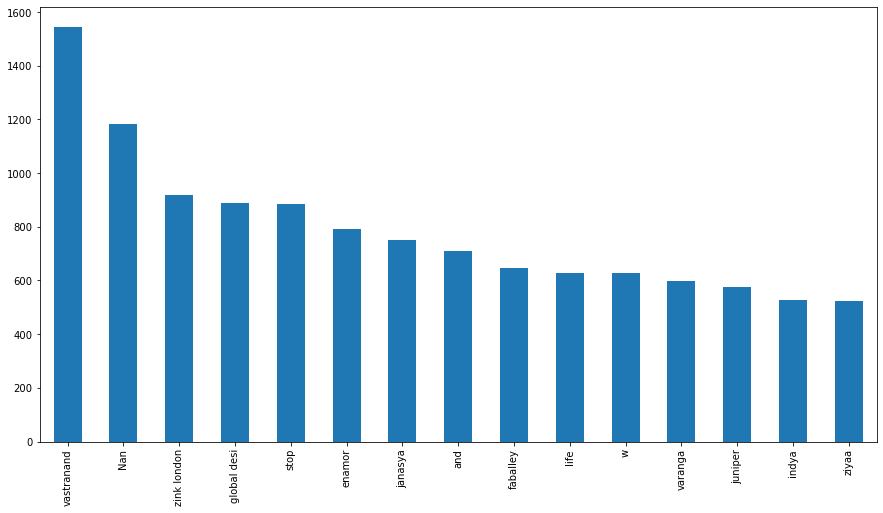

In [136]:
### Un pequeño Zoom a las Brandnames con más presencia 
plt.figure(figsize = (15,8))
df1['BrandName'].value_counts().head(15).plot(kind='bar') 


En este "zoom" se puede ver las marcas con mayor frecuencia. 
Se ve que el Nan tiene una alta frecuencia, lo que da una idea de que se vende artículos sin marca alguna, quizá comprados a pequeños productores.

Text(0.5, 1.0, 'Q de Category')

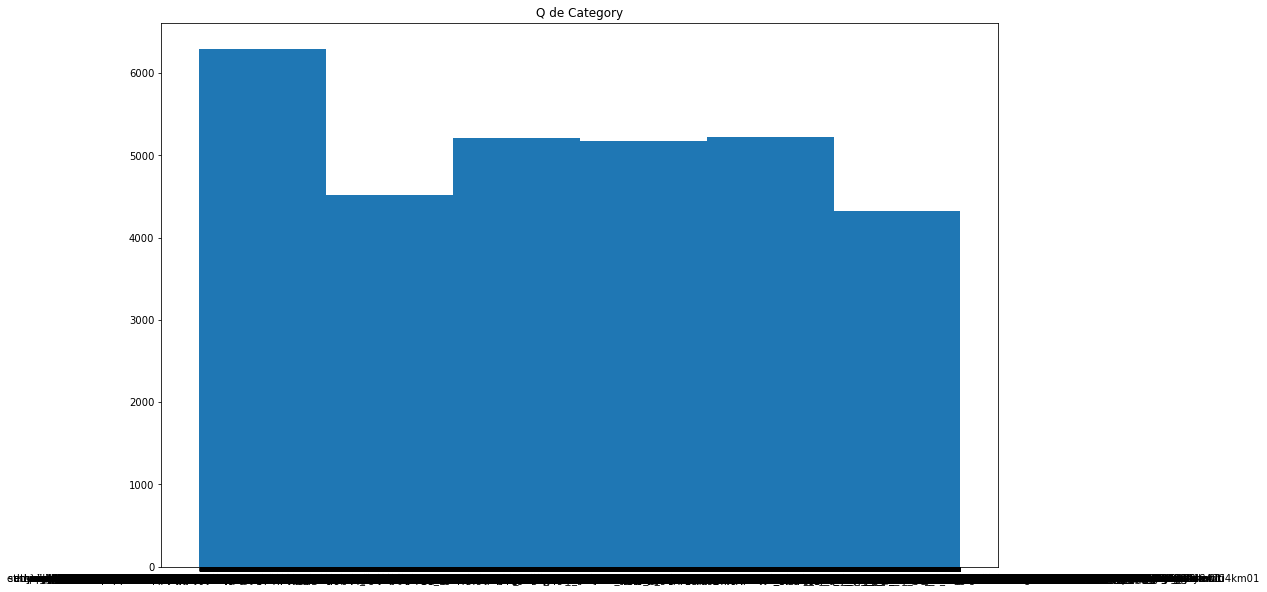

In [22]:
plt.figure(figsize=(15,10))
plt.hist(df1["Deatils"], bins = 6)
plt.xlabel("")
plt.ylabel("")
plt.title("Details")

Detalles tiene más de 20mil valores unicos. Es data NO útil.

Text(0.5, 1.0, 'Q de Category')

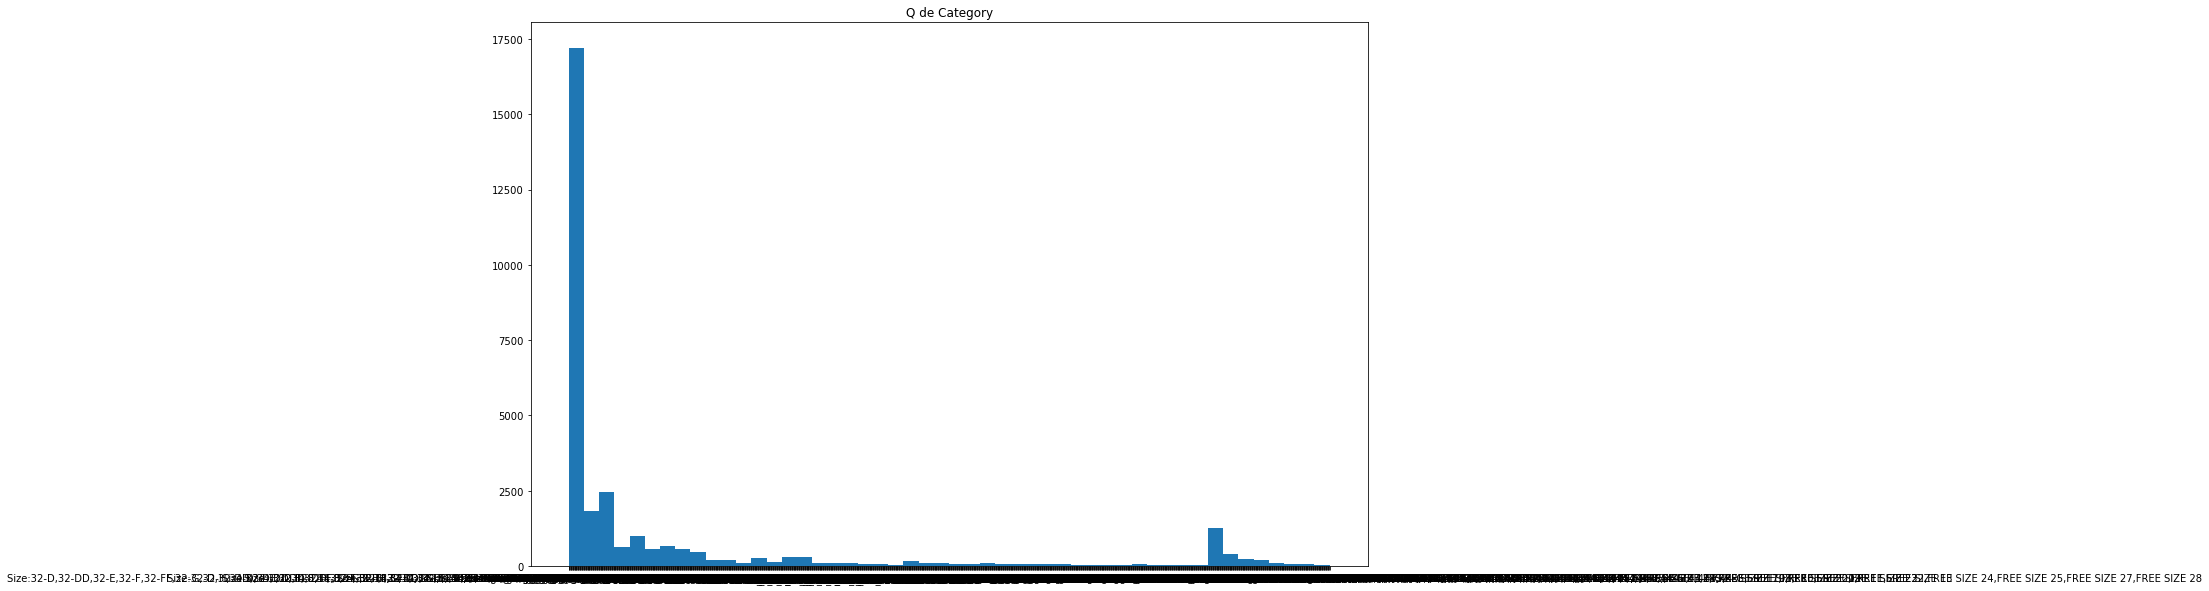

In [102]:
plt.figure(figsize=(15,10))
plt.hist(df1["Sizes"], bins = 50)
plt.xlabel("")
plt.ylabel("")
plt.title("Sizes")

Demasiados valores unicos y poco útiles

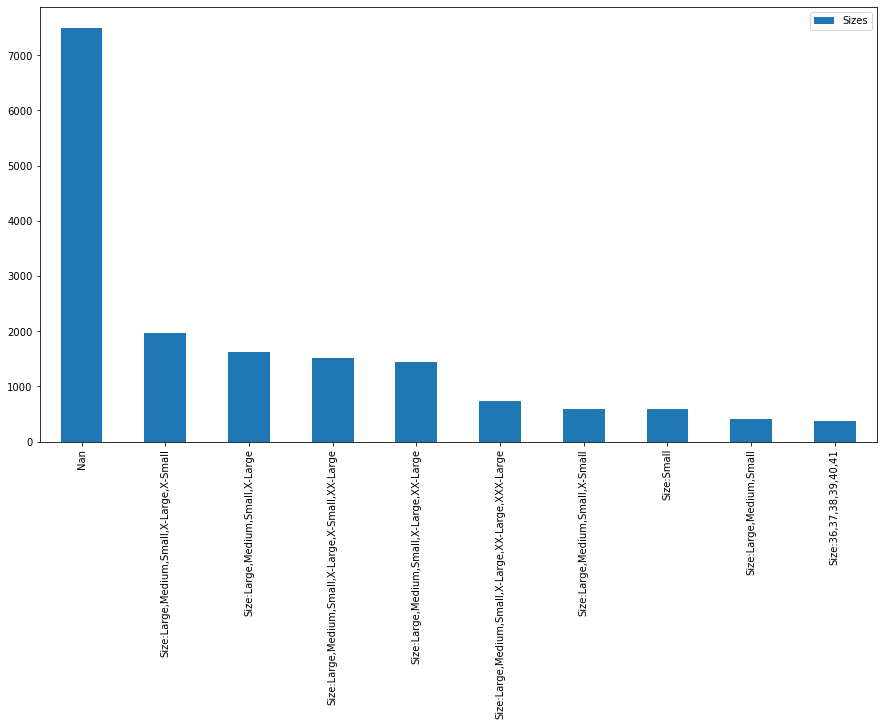

In [103]:
### Un pequeño Zoom a las categorías más relevantes
plt.figure(figsize = (15,8))
df1['Sizes'].value_counts().head(10).plot(kind='bar')
plt.legend()

Los sizes nos pueden indicar que hay varios artículos que no tienen un size como peude ser relojes o perfumes. 

Text(0.5, 1.0, 'Q de Category')

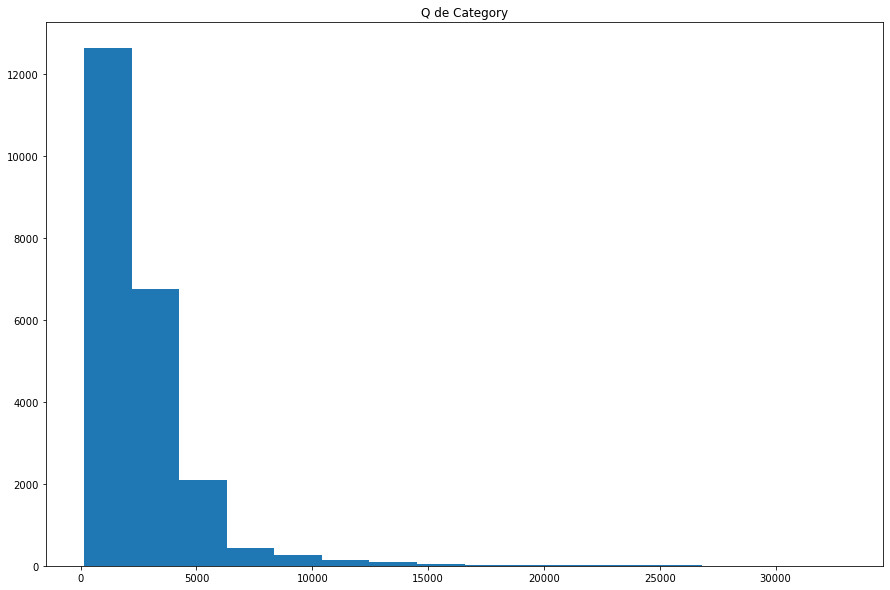

In [24]:
plt.figure(figsize=(15,10))
plt.hist(df1["MRP"], bins = 16)
plt.xlabel("")
plt.ylabel("")
plt.title("Max Retail price")

La mayoría de artículos con un MRP, están entre > 0 a un valor de 5000

Text(0.5, 1.0, 'Q de Category')

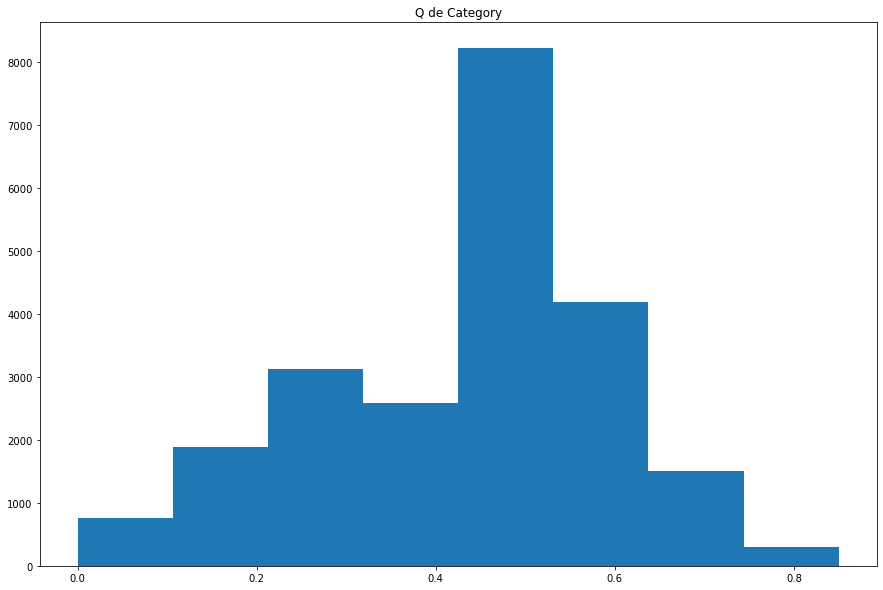

In [125]:
plt.figure(figsize=(15,10))
plt.hist(df1["Discount"], bins = 8)
plt.xlabel("")
plt.ylabel("")
plt.title("DSCTO %%")

El descuento más frecuente es del 50%, que es aprox 20% de la data

In [129]:
df1.loc[df1.Discount == 0.5, "Discount"]

# Un 20% aprox de la data lleva decuentos del 50% 

0        0.5
2        0.5
4        0.5
6        0.5
7        0.5
        ... 
30700    0.5
30716    0.5
30736    0.5
30740    0.5
30747    0.5
Name: Discount, Length: 7605, dtype: float64

Text(0.5, 1.0, 'Q de Category')

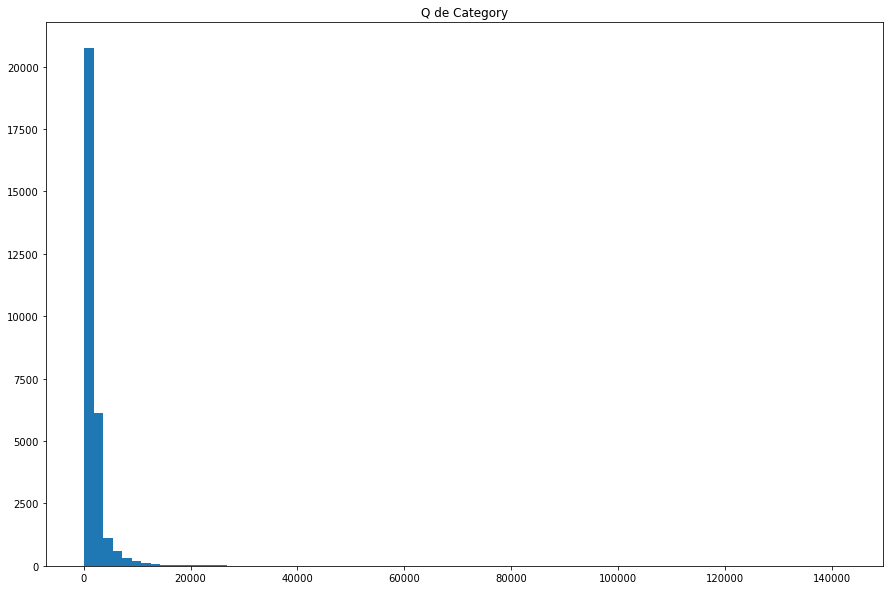

In [134]:
plt.figure(figsize=(15,10))
plt.hist(df1["SellPrice"], bins = 80)
plt.xlabel("")
plt.ylabel("")
plt.title("Precio de Venta")

Una gran parte de productos (20%) está con 50% de descuento. Sin embargo, en este gráfico no se aprecia bien. (Se peude inferir ello por los precios de la col MRP.

Pero mas adelante se observará que los artículos que no tienen descuentos (nan values) son articulos muy caros y de lujo.
Además, esos artículos caros y de lujo no tienen un MRP.

In [93]:
df1[["SellPrice"]].describe()

# Hay artículos que llegan a venderse hasta en 142 mil 

,SellPrice
count,29575.000000
mean,1923.680642
std,3049.333237
min,74.000000
25%,749.000000
50%,1209.000000
75%,2069.000000
max,142500.000000


In [151]:
df1.loc[df1.SellPrice.isna() , "SellPrice"]

22      NaN
48      NaN
74      NaN
100     NaN
126     NaN
         ..
30650   NaN
30676   NaN
30702   NaN
30728   NaN
30754   NaN
Name: SellPrice, Length: 1183, dtype: float64

In [152]:
## Al parecer todas las columnas, en donde el SellPrice es Nan, también son Nan, exceptuando la Columna Category
## Se puede decir que estas rows Nan son "Safe to drop"

Lista = [126,100,30650,30676,30702,30728,30754,22 , 48 ,74]
for x in Lista:
    print("\n", df1.loc[x,:])


 BrandName                  Nan
Deatils                    Nan
Sizes                      Nan
MRP                        NaN
SellPrice                  NaN
Discount                   NaN
Category     Westernwear-Women
Name: 126, dtype: object

 BrandName                  Nan
Deatils                    Nan
Sizes                      Nan
MRP                        NaN
SellPrice                  NaN
Discount                   NaN
Category     Westernwear-Women
Name: 100, dtype: object

 BrandName                Nan
Deatils                  Nan
Sizes                    Nan
MRP                      NaN
SellPrice                NaN
Discount                 NaN
Category     Jewellery-Women
Name: 30650, dtype: object

 BrandName                Nan
Deatils                  Nan
Sizes                    Nan
MRP                      NaN
SellPrice                NaN
Discount                 NaN
Category     Jewellery-Women
Name: 30676, dtype: object

 BrandName                Nan
Deatils          

In [94]:
df1[["MRP"]].describe()

,MRP
count,22550.000000
mean,2644.677295
std,2322.499186
min,149.000000
25%,1399.000000
50%,1999.000000
75%,3099.000000
max,32995.000000


In [153]:
df1.loc[df1.MRP.isna() , "MRP"]

22      NaN
28      NaN
36      NaN
48      NaN
61      NaN
         ..
30752   NaN
30753   NaN
30754   NaN
30756   NaN
30757   NaN
Name: MRP, Length: 8208, dtype: float64

In [166]:
## En el caso del MRP, podemos ver que NO TODOS los Nan tienen vacías otras Columnas.

Lista = [28,36,61,30752,30753,30756,30754,22 , 48]
for x in Lista:
    print("\n", df1.loc[x,:])


 BrandName                                           zink z
Deatils      solid cotton blend v neck womens top - maroon
Sizes              Size:Large,Medium,Small,X-Large,X-Small
MRP                                                    NaN
SellPrice                                             1299
Discount                                               NaN
Category                                 Westernwear-Women
Name: 28, dtype: object

 BrandName                                              fratini
Deatils      printed polyester blend round neck womens a-li...
Sizes                 Size:Large,Medium,Small,X-Large,XX-Large
MRP                                                        NaN
SellPrice                                                 1799
Discount                                                   NaN
Category                                     Westernwear-Women
Name: 36, dtype: object

 BrandName                                               levis
Deatils      graphic cotton ro

In [117]:
# Observemos que artículos son los más caros
df1.loc[df1.SellPrice > 30000, "SellPrice"]

27124     40995.0
27297     44000.0
27394     39995.0
27431     48500.0
27437     55700.0
27539    142500.0
27551    137900.0
27693     35000.0
27704     91900.0
27750     33495.0
27844     48500.0
27912     36900.0
27927     99100.0
28091     36995.0
28113     36000.0
28168     91100.0
28222     37500.0
28322    108000.0
28340     36995.0
28352     34500.0
28461     31995.0
30435     31000.0
Name: SellPrice, dtype: float64

In [104]:
Max_min_SP = df1.loc[df1.SellPrice > 30000, "SellPrice"]
Max_min_SP.describe()

count      1345.000000
mean      11637.371004
std        9066.492431
min        6029.000000
25%        7150.000000
50%        8995.000000
75%       13196.000000
max      142500.000000
Name: SellPrice, dtype: float64

#### Estos son artículos de lujo sin descuentos y con altos Sell Price
más adelante se peuden observar en gráficos
#### Estos artículos TIENEN un MRP de tipo Nan, y carecen de descuentos

In [143]:
Lista = [27124,28352,30435,28091,27750,28461,27551,27124 ,27539, 28322  ]
for x in Lista:
    print("\n", df1.loc[x,:])
    
# Efectivamente, se pueden ver marcas de lujo en estos artículos con altos SellPrice


 BrandName                                         michael kors
Deatils      womens 41 mm lennox pink dial stainless steel ...
Sizes                                                      Nan
MRP                                                        NaN
SellPrice                                                40995
Discount                                                   NaN
Category                                         Watches-Women
Name: 27124, dtype: object

 BrandName                                               tissot
Deatils      womens pink dial stainless steel strap analogu...
Sizes                                                      Nan
MRP                                                        NaN
SellPrice                                                34500
Discount                                                   NaN
Category                                         Watches-Women
Name: 28352, dtype: object

 BrandName               swarovski
Deatils      angelic nec

In [135]:
### Se copia el df1 en un df2 para hacer un clipping de sell price para que se pueda osbervar mejor el gráfico
df2 =  df1.copy()

In [137]:
df2.loc[df2.SellPrice > 30000, "SellPrice"] = 30000

Text(0.5, 1.0, 'Q de Category')

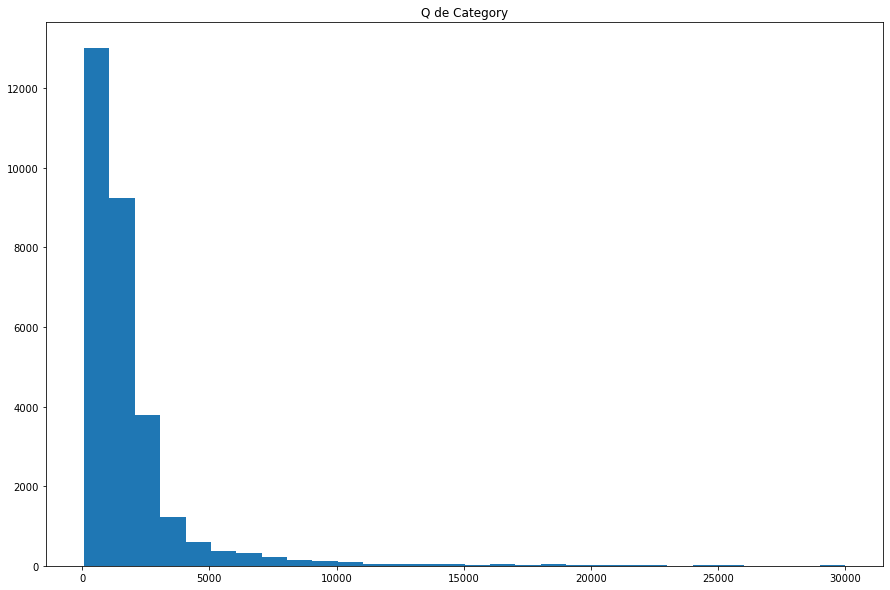

In [139]:
plt.figure(figsize=(15,10))
plt.hist(df2["SellPrice"], bins = 30)
plt.xlabel("")
plt.ylabel("")
plt.title("Q de Category")

Ahora si se ve que como una buena porcion (20%) del MRP tiene un descuento del 50% acá se observa que su descuento aplciado si es real ya que varios pasan de ~2000 a ~1000

### Columna Category

Se hace una exploración de dat en una de las columnas con más importancia

In [51]:
df1["Category"].value_counts()

Indianwear-Women            10374
Westernwear-Women           10374
Lingerie&Nightwear-Women     3354
Footwear-Women               2574
Watches-Women                1794
Jewellery-Women              1794
Fragrance-Women               494
Name: Category, dtype: int64

La mayor parte de la data se divida en ropa hinú y occidental para dama

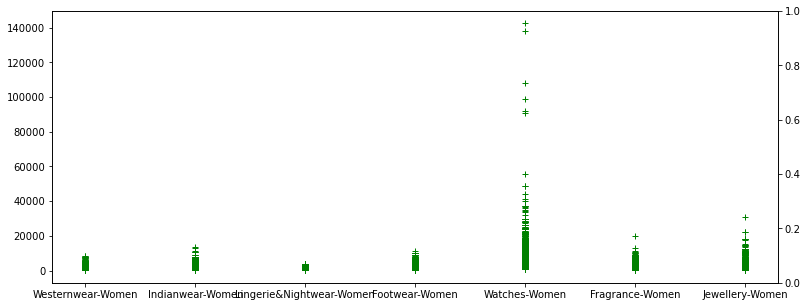

In [37]:
### Se crea un gráfico para ver por donde oscilan los precios de cada subcategoría de Category

fig, ax1 = plt.subplots(figsize=(13,5))
x = df1['Category']
y1 = df1['SellPrice']

ax2 = ax1.twinx()

ax1.plot(x, y1, 'g+')

En este gráfico se aprecia cuales son los precios máximos que las subcategorías de Category llegan a tener. 
Dentro de Category: Watches_Women, hay artículos que llegan a costar 140 000. Pero son muy pocos los artículos quye llegan a tener precios tan altos
La categoría con menores precios es Lingerie

Este gráfico a primera vista puede engañarte.

In [40]:
## Se crean gráficos de Subcategorias de Categry vs SellPrice 
WWS = df1.loc[df1.Category  == "Watches-Women", ["Category","SellPrice"]]

Text(0.5, 1.0, 'WomanWatches vs SellPrice')

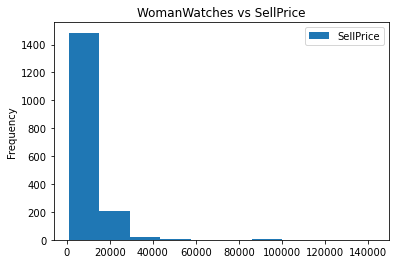

In [39]:
WWS.plot( kind='hist')
plt.title("WomanWatches vs SellPrice")

Se puede ver que los relojes de mujeres en su mayoría rondan los > 0 & 10000 Rps.
También se puede ver que algunos relojes de lujo superan los 80 000 y llegan a los 140 000

In [54]:
JJS = df1.loc[df1.Category  == "Jewellery-Women", ["Category","SellPrice"]]

Text(0.5, 1.0, 'Jewellery vs SellPrice')

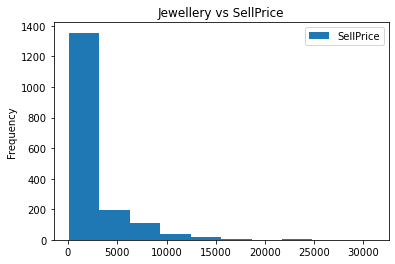

In [55]:
JJS.plot( kind='hist')
plt.title("Jewellery vs SellPrice")

La joyería suele ser barata, son muy pocos los artícuos de lujo que se venden por más de 20.000

In [61]:
FWS = df1.loc[df1.Category  == "Fragrance-Women", ["Category","SellPrice"]]

Text(0.5, 1.0, 'Fragrance-Women vs SellPrice')

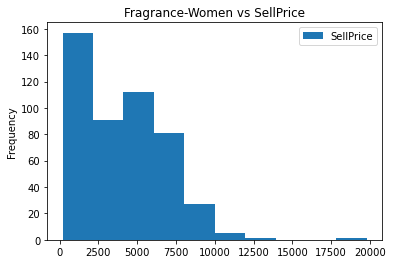

In [62]:
FWS.plot( kind='hist')
plt.title("Fragrance-Women vs SellPrice")

En su mayoría las fragancias tienen valores económicos y medios.
Sin embargo hay fragancias que rondan los ~18mil

In [56]:
LNS = df1.loc[df1.Category  == "Lingerie&Nightwear-Women", ["Category","SellPrice"]]

Text(0.5, 1.0, 'Lingerie&Nightwear-Women vs SellPrice')

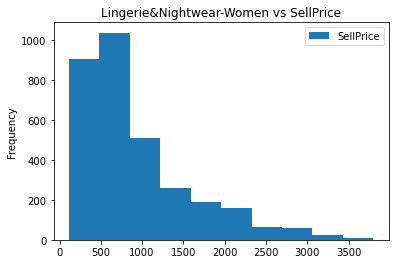

In [57]:
LNS.plot( kind='hist')
plt.title("Lingerie&Nightwear-Women vs SellPrice")

La categoría más barata es Lingerie, seguramente es ropa interior de diario.

In [59]:
IWS = df1.loc[df1.Category  == "Indianwear-Women", ["Category","SellPrice"]]

Text(0.5, 1.0, 'Indianwear-Women vs SellPrice')

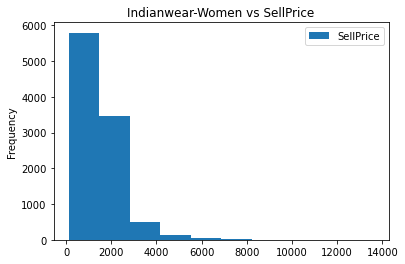

In [60]:
IWS.plot( kind='hist')
plt.title("Indianwear-Women vs SellPrice")

Indianwear es la categoría más vendida y resulta económica

In [169]:
WIWS = df1.loc[df1.Category  == "Westernwear-Women", ["Category","SellPrice"]]

Text(0.5, 1.0, 'Western-Women vs SellPrice')

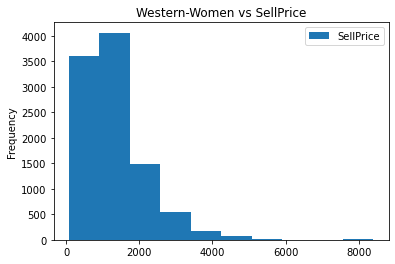

In [170]:
WIWS.plot( kind='hist')
plt.title("Western-Women vs SellPrice")

WesterWear al igual que IndianWear es una categoría muy vendida y económica

#### Exploración de data entre Category y Discounts

#Indianwear-Women            10374
#Westernwear-Women           10374
#Lingerie&Nightwear-Women     3354
#Footwear-Women               2574
#Watches-Women                1794
#Jewellery-Women              1794
#Fragrance-Women               494

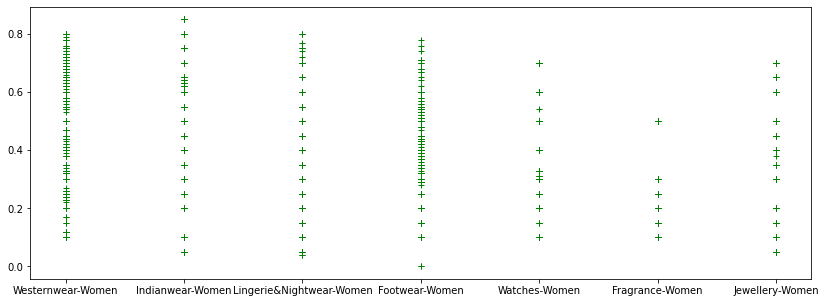

In [36]:
fig, ax1 = plt.subplots(figsize=(14,5))
x = df1['Category']
y1 = df1['Discount']

ax1.plot(x, y1, 'g+')

En todas las subcategorías de category los descuentos llegan hasta aproximadamente 80

In [31]:
WWD = df1.loc[df1.Category  == "Watches-Women", ["Category","Discount"]]

Text(0.5, 1.0, 'WomanWatches vs Discounts')

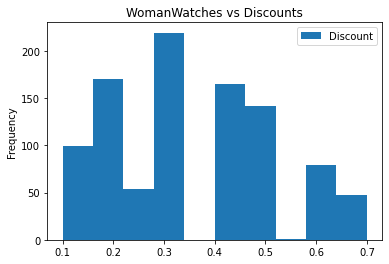

In [32]:
WWD.plot( kind='hist')
plt.title("WomanWatches vs Discounts")

El descuento tiene una distribución cuasi normal aplicado a la categoría de "Watches-Women".
Se puede decir que es más frecuente obtener descuentos del 20,30,40,50 %.
Además, aproximadamente la mitad de todos los Relojes en venta se venden con descuento

In [33]:
FFD = df1.loc[df1.Category  == "Fragrance-Women", ["Category","Discount"]]

Text(0.5, 1.0, 'Fragrance-Women vs Discounts')

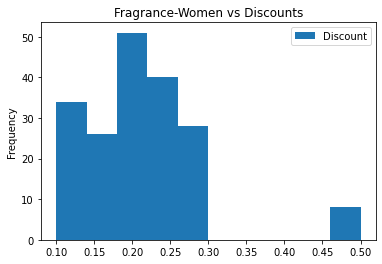

In [34]:
FFD.plot( kind='hist')
plt.title("Fragrance-Women vs Discounts")


Perfumes suelen tener pocos descuentos

In [65]:
JJD = df1.loc[df1.Category  == "Jewellery-Women", ["Category","Discount"]]

Text(0.5, 1.0, 'Jewellery-Women vs Discounts')

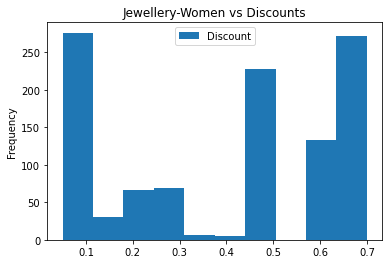

In [66]:
JJD.plot( kind='hist')
plt.title("Jewellery-Women vs Discounts")

Lo más frecuente son descuentos bajos del 10, descuentos altos del 50 y 7 por ciento. También se puede decir que casi la mitad de la joyería se vende con descuento.

In [69]:
WID = df1.loc[df1.Category  == "Westernwear-Women", ["Category","Discount"]]

Text(0.5, 1.0, 'Westernwear-Women  vs Discounts')

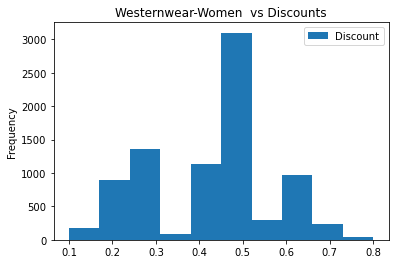

In [70]:
WID.plot( kind='hist')
plt.title("Westernwear-Women  vs Discounts")

Las ropas occidentales tienen más frecuentemente descuentos del 50%. Y más de la mitad de la ropa se vende con descuentos.

In [69]:
WID = df1.loc[df1.Category  == "Westernwear-Women", ["Category","Discount"]]

Text(0.5, 1.0, 'Indianwear-Women   vs Discounts')

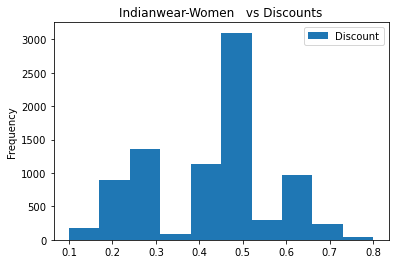

In [71]:
WID.plot( kind='hist')
plt.title("Indianwear-Women   vs Discounts")

Las ropas hindús tienen más frecuentemente descuentos del 50% Similar a las ropas occidentales

In [38]:
## Se hace una agrupaciones de Brand vs Descuento (mayor)
DB = df1[['BrandName','Discount']].sort_values(by='Discount',ascending=False).head(250)
DB.style.background_gradient(cmap = 'coolwarm')

,BrandName,Discount
11523,myshka,0.850000
11763,myshka,0.850000
11197,myshka,0.850000
10409,myshka,0.850000
10845,myshka,0.850000
11602,myshka,0.850000
10511,myshka,0.850000
11628,myshka,0.850000
10657,myshka,0.850000
4499,lovegen,0.800000


Text(0.5, 1.0, 'Top 100 Marcas con más descuentos altos')

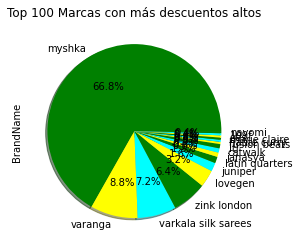

In [127]:
colors = ( "green", "yellow", "cyan") 

DB['BrandName'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' , shadow= True , colors = colors )
plt.title("Top 100 Marcas con más descuentos altos")

Las marcas que se suelen ofertar más son Myshka, varanga, varkala, zink, lovegen.

In [39]:
hp = df1[['BrandName','SellPrice' , 'Category', 'MRP']].sort_values(by='SellPrice',ascending=False).head(50)
hp.style.background_gradient(cmap = 'coolwarm')

C:\Users\CLIENTE\anaconda3\lib\site-packages\pandas\io\formats\style.py:1089: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(s.to_numpy()) if vmin is None else vmin
C:\Users\CLIENTE\anaconda3\lib\site-packages\pandas\io\formats\style.py:1090: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(s.to_numpy()) if vmax is None else vmax


,BrandName,SellPrice,Category,MRP
27539,versace,142500.000000,Watches-Women,nan
27551,versace,137900.000000,Watches-Women,nan
28322,versace,108000.000000,Watches-Women,nan
27927,versace,99100.000000,Watches-Women,nan
27704,versace,91900.000000,Watches-Women,nan
28168,versace,91100.000000,Watches-Women,nan
27437,versace,55700.000000,Watches-Women,nan
27431,tissot,48500.000000,Watches-Women,nan
27844,versace,48500.000000,Watches-Women,nan
27297,versace,44000.000000,Watches-Women,nan


##### Los productos más caros son los relojes de mujer

Text(0.5, 1.0, 'Top 100 Marcas más caras')

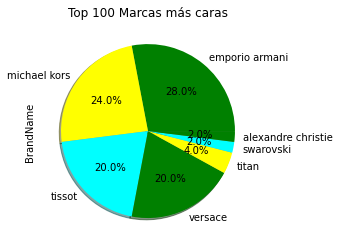

In [178]:
colors = ( "green", "yellow", "cyan") 

hp['BrandName'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' , shadow= True , colors = colors )
plt.title("Top 100 Marcas más caras")

Los precios más altos pertenencen a marcas de lujo.

Text(0.5, 1.0, 'Top de Categorías más caras')

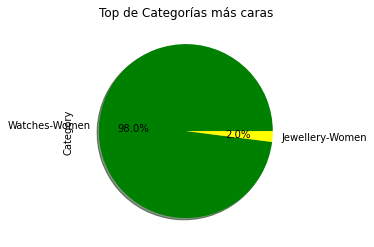

In [179]:
colors = ( "green", "yellow", "cyan") 

hp['Category'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' , shadow= True , colors = colors )
plt.title("Top de Categorías más caras")

In [40]:
#Observar los productos más baratos
lp = df1[['BrandName','SellPrice', 'Category']].sort_values(by='SellPrice',ascending=True).head(50)
lp.style.background_gradient(cmap = 'coolwarm')

,BrandName,SellPrice,Category
2155,life,74.000000,Westernwear-Women
29174,ayesha,89.000000,Jewellery-Women
29366,ayesha,89.000000,Jewellery-Women
29154,ayesha,89.000000,Jewellery-Women
29263,ayesha,89.000000,Jewellery-Women
29041,ayesha,89.000000,Jewellery-Women
29503,ayesha,89.000000,Jewellery-Women
30127,ayesha,89.000000,Jewellery-Women
29652,ayesha,89.000000,Jewellery-Women
29276,ayesha,89.000000,Jewellery-Women


##### Los productos más baratos suelen ser Joyería, lencería y ropa occidental de mujer

Text(0.5, 1.0, 'Top 100 Marcas más baratas')

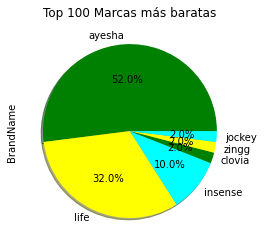

In [181]:
colors = ( "green", "yellow", "cyan") 

lp['BrandName'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' , shadow= True , colors = colors )
plt.title("Top 100 Marcas más baratas")

Text(0.5, 1.0, 'Top Categorías más baratas')

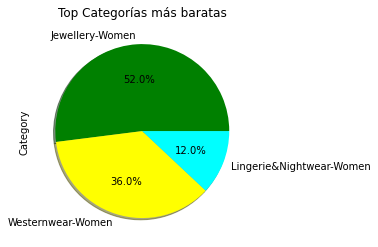

In [182]:
colors = ( "green", "yellow", "cyan") 

lp['Category'].value_counts().plot(kind='pie' ,autopct='%1.1f%%' , shadow= True , colors = colors )
plt.title("Top Categorías más baratas")

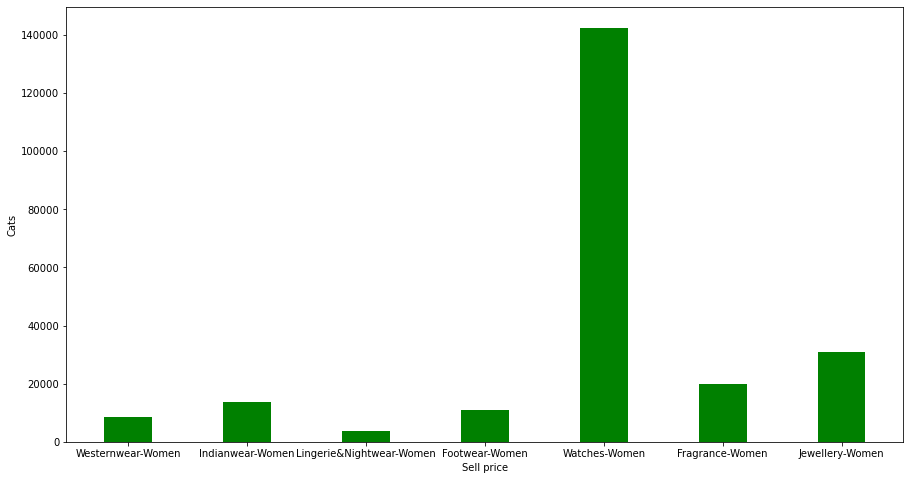

In [138]:
plt.figure(figsize = (15,8))
SP = df1['SellPrice']
Cat = df1['Category']
  
plt.xlabel('Sell price')
plt.ylabel('Cats')
plt.bar(Cat, SP, color='green', width=0.4)
  
plt.show()

En este gráfico se puede apreciar mejor que algunos de los relojes de mujer llegan a tener precios muy elevados

In [163]:
## Agrupar BrandName para ver otras columnas respecto a la marca de BrandName
Lista2 = ["michael kors","versace", "tissot", "emporio armani"]
for x in Lista2:
    grouped = df1.groupby(df1['BrandName'])
    print(grouped.get_group(x))
    print("\n", "*"*90, "\n")

          BrandName                                            Deatils Sizes  \
26684  michael kors  womens 44 mm gen 6 bradshaw full color display...   Nan   
26697  michael kors  womens 39 mm parker red dial leather chronogra...   Nan   
26720  michael kors  womens 39 mm pyper black dial stainless steel ...   Nan   
26721  michael kors  womens 33 mm kenly rose gold dial stainless st...   Nan   
26754  michael kors  womens mini parker rose gold dial stainless st...   Nan   
...             ...                                                ...   ...   
30554  michael kors   womens premium rose gold earring  - mkc1340a6791   Nan   
30562  michael kors  womens premium gold earring  - mkc1033an710 - ...   Nan   
30568  michael kors       womens hearts silver earring  - mkc1243an040   Nan   
30600  michael kors               premium silver bracelet mkc1454an040   Nan   
30721  michael kors        premium gold womens earrings - mkc1367a1710   Nan   

           MRP  SellPrice  Discount    

Se peude ver que no hay "sizes", "discounts", ni "MRP" en artículos de lujo tissot. Similar comportamiento se peuden er en otros artículos de lujo
La falta de MRP en artículos de lujo se vió anteriormente

<h3 align="center">Final de la exploración de Data</h3> 